In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# query, loop over and print out measurements.
#hawaii_data = session.query(Measurement).filter(Measurement).all()
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
engine.execute('SELECT * FROM measurement LIMIT 30').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [14]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
engine.execute('SELECT * FROM station LIMIT 30').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [16]:
# query to retrieve the last 12 months of precipitation 
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# prcp for last 12 months
last_date=datetime.date(2017, 8 ,23)
#last_12=last_date - dt.timedelta(dayes=12)
last_12_months=datetime.date(2016, 8 ,23)

In [18]:
prcp_last_12=session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date > last_12_months).order_by(Measurement.date).all()

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
#data frame the ^ prcr_last_12
df = pd.DataFrame(prcp_last_12, columns=['date', 'prcp'])
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [20]:
df=df.fillna(0)
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


In [21]:
# Sort the dataframe by date
df=df.sort_values(by='date')
df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2223.000000
mean,0.159951
std,0.441220
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


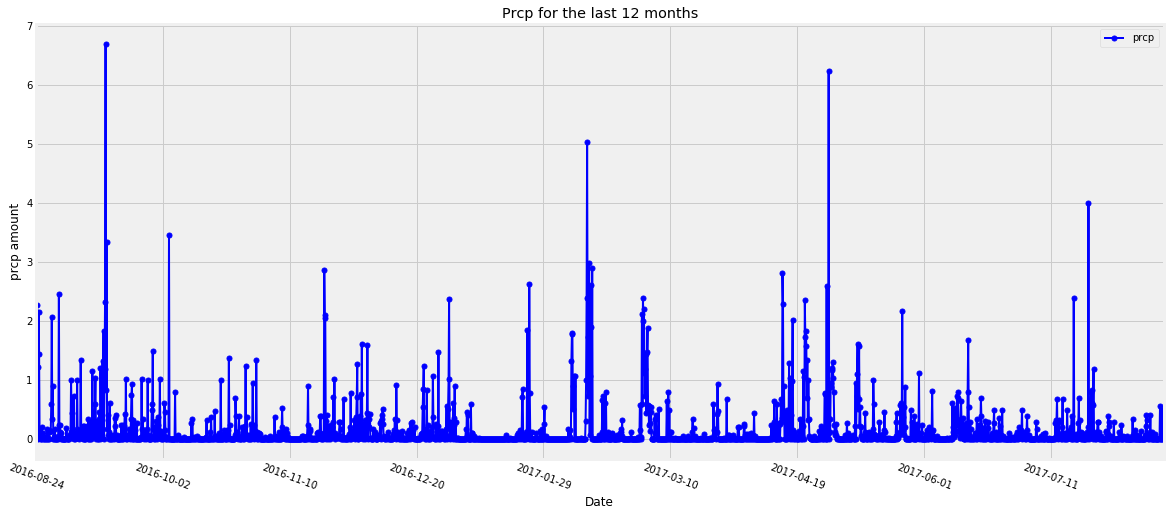

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
#graph the 12 months data
graph = df.plot(x="date",figsize = (18,8), color = 'blue', rot = 340,lw=2,\
               marker='.', markersize=10, title='Prcp for the last 12 months')
graph.set_xlabel("Date")
graph.set_ylabel("prcp amount")
plt.savefig("prcp.png")

In [ ]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.station).count()

9

In [ ]:
active_stations = session.query(Measurement.station, func.count(Measurement.tobs).label('Observations'))\
                  .group_by(Measurement.station).order_by(func.count(Measurement.tobs)).all()    
active_stations

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [ ]:
active_stations = pd.DataFrame(active_stations)

In [ ]:
active_stations.sort_values(by='Observations', ascending = False)

,station,Observations
8,USC00519281,2772
7,USC00519397,2724
6,USC00513117,2709
5,USC00519523,2669
4,USC00516128,2612
3,USC00514830,2202
2,USC00511918,1979
1,USC00517948,1372
0,USC00518838,511


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temps = [
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
temp_measures = session.query(*temps).all()
temp_measures

[(53.0, 87.0, 73.09795396419437)]

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
top_station = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station=="USC00519281")\
.filter(Measurement.date > last_12_months).order_by(Measurement.date).all()
top_station=pd.DataFrame(top_station)

In [ ]:
# load the results into a dataframe
observation_df = pd.DataFrame.from_records(top_station)
observation_df = observation_df.rename(columns={0: 'Station', 1: 'Date', 2:'Observations'})
print(observation_df.count())
observation_df.head()

station    351
tobs       351
dtype: int64


,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


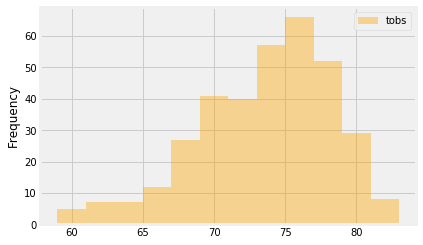

In [ ]:
# Plot the results as a histogram with bins=12
observation_df.plot.hist(by=observation_df, bins=12, color='orange', alpha = 0.4)
plt.ylabel("Frequency")
plt.savefig("Frequency.png")
plt.show()


In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# calculate the min/max/avg from last year that matches my trip date
trip_arrive = datetime.date(2017, 2, 1)
trip_leave = datetime.date(2017, 2, 15)
last_year = datetime.timedelta(days=365)
temp_avg_lst_year = (calc_temps((trip_arrive-last_year), (trip_leave-last_year)))
print(temp_avg_lst_year)

[(56.0, 69.44791666666667, 79.0)]


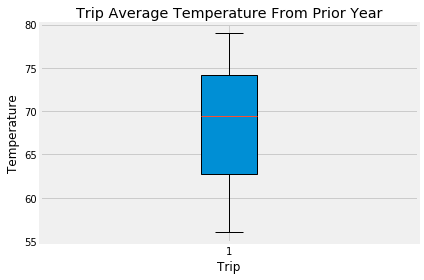

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# plotting the data as a boxplot

fig, ax = plt.subplots()
x = range(len(temp_avg_lst_year))
ax.boxplot(temp_avg_lst_year, patch_artist=True)
ax.set_title('Trip Average Temperature From Prior Year')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.savefig("AvgTemp.png")
plt.show()


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
 # 1. import Flask
from flask import Flask, jsonify
# 2. Flask Setup - create an app, being sure to pass __name__
app = Flask(__name__)





# Complete the routes for your app here
# 3. Define what to do when a user hits the index route
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/><br/>"
        f"/api/v1.0/precipitation - Precipitation<br/>"

        f"/api/v1.0/stations"
        f"- List of stations from the dataset<br/>"

        f"/api/v1.0/tobs"
        f"- Temperature Observations (tobs) for the previous year<br/>"

        f"/api/v1.0/&ltstart&gt"
        f"- Calculates MIN, AVG, and MAX temp. for all dates greater than and equal to the start date<br/>"

        f"/api/v1.0/&ltstart&gt/&ltend&gt"
        f"- Calculates MIN, AVG, and MAX temp. for a given start or start-end range<br/>"
    )





@app.route("/api/v1.0/precipitation")
def precipitation():
    prcp_last_12 = observation_df[["Date", "Observations"]]
    # prec_df = prec_df.set_index("Date")
    # return jsonify(prec_df.to_dict())
    return jsonify(prcp_last_12.to_dict())





@app.route("/api/v1.0/stations")
def stations():
    records = session.query(Station.station, Station.name).all()
    station_df = pd.DataFrame.from_records(records)
    station_df = station_df.rename(columns={0: 'Station', 1: 'Name'})
    return jsonify(station_df.to_dict())




@app.route("/api/v1.0/tobs")
def tobs():
    tobs_df = observation_df[["Date", "Observations"]]
    tobs_df = tobs_df.set_index("Date")
    return jsonify(tobs_df.to_dict())





def calc_temp_s(start_date):
    records = session.query(func.max(Measurement.tobs).label('max_temp'), func.avg(Measurement.tobs).label('avg_temp')                                ,func.min(Measurement.tobs).label('min_temp'))                  .filter(Measurement.date >= start_date).all()    
    return records[0]





@app.route("/api/v1.0/<start>")
def temp(start):
    max_tmp, avg_tmp, min_tmp = calc_temp_s(start)
    temp_dict = {"Max. Temp.": max_tmp,
                 "Avg. Temp.": avg_tmp,
                 "Min. Temp.": min_tmp}
    return jsonify(temp_dict)




@app.route("/api/v1.0/<start>/<end>")
def calc_temp_se(start, end):
    if datetime.strptime(start, '%Y-%m-%d') > datetime.strptime(end, '%Y-%m-%d'):
        records = calc_temps(start, end)
        max_tmp, avg_tmp, min_tmp = records[0]
        temp_dict = {"Max. Temp.": max_tmp,
                 "Avg. Temp.": avg_tmp,
                 "Min. Temp.": min_tmp}
        return jsonify(temp_dict)
    else:
        return "Please make sure Start Date is always greater than End Date."


    


# Create your app.run statement here
if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


## Optional Challenge Assignment

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
